# Statistics for Biologists
This notebook will discuss **descriptive** and **inferential** statistics, and introduce ways to implement them in Python.

You should run the cells in this notebook step-by-step, completing necessary tasks and answering questions on your quiz along the way.

### By the end of this notebook, you will be able to:
* Identify when to use descriptive or inferential statistics
* Apply the appropriate statistical tests to compare two groups
* Use the stats package from SciPy to run simple tests in Python
* Test differences between spiny and aspiny cells

### Table of Contents
1. [Population vs sample distributions](#one)
2. [The Central Limit Theorem](#two)
3. [Skewed Distributions](#three)
4. [Hypothesis Testing](#four)
5. [Testing the Difference Between Cell Types](#five)

## Setup

First things first, let's configure our coding environment with the packages we'll need. We'll use `import` to bring in additional code packages and nickname them. For example, we're importing a code package called `numpy` and nicknaming it `np`. In the future, when we refer to numpy, we'll write `np`.

In [1]:
# Import our necessary toolboxes and tell matplotlib to plot inline
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from scipy import stats # new package for today, for statistical tools!

%matplotlib inline
%config InlineBackend.figure_format = 'retina' # configure high-resolution plotting

print('Packages imported.')

Packages imported.


<a id="one"></a>
## Part One: Population vs sample distributions
**Descriptive statistics** summarize the main features of a data set.

It's important to distinguish between the following:
* **Observation**: result from one trial of an experiment
* **Sample**: results from multiple independent trials
* **Population**: the *ground truth*; all possible observations that could be seen

Distributions differ in their **location** (mean, $\mu$) and **spread** (standard deviation, $\sigma$). Using `np.random.normal`, which draws a given number of data points from a defined population, we'll define a **population distribution** and plot it. [`np.random.normal`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) has three arguments: a mu, a sigma, and a size.

>**Task**: Run the cell below. Change the mu and sigma to see how this changes the plotted distribution. When you're done observing how this changes your distribution, change the mu back to 3 and the sigma back to 2 and re-run the cell.

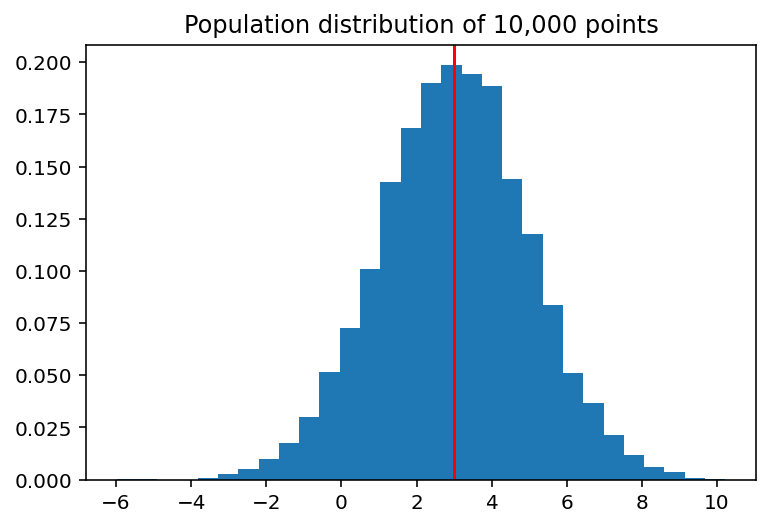

In [2]:
# Decide on a mean and a standard deviation
mu = 3
sigma = 2

# Use np.random.normal to create a distribution of 10,000 points with our given mu & sigma
pop = np.random.normal(mu, sigma, 10000)

# Plot a histogram with 30 bins
# Giving it the argument density=True will plot normalized counts
# This will create a probability density (rather than raw counts)
plt.hist(pop, 30, density=True)
plt.axvline(mu,color='r')
plt.title('Population distribution of 10,000 points')
plt.show()

There are various ways we can describe the distribution of the dataset, beyond the standard deviation:
* Range (minimum and maximum)
* Variance ($\sigma^2$)
* Standard Error of the Mean (S.E.M., $\sigma/\sqrt{n}$)
* Confidence Intervals

We can easily get many of these descriptive statistics by using the `scipy stats` package method `describe()`. [Documentation here.](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.describe.html). Note that <code>stats.describe()</code> doesn't give us the median (annoyingly) but `np.median()` can!
* The `stats.skewtest()` method ([documentation here]

In [3]:
stats.describe(pop)

DescribeResult(nobs=10000, minmax=(-5.986084357503614, 10.219771092566688), mean=3.0108842759603367, variance=3.9590975408659013, skewness=-0.02772900314337175, kurtosis=0.05670940568653071)

We created a normal distribution from a mean of 3 but with limited data points, so these values are *just* slightly off from what we would expect.

Our variable `pop` is the "ground truth" population. However, we'll rarely have *10,000* datapoints in our sample. So, let's generate a more realistic sample, and see how the mean compares.

DescribeResult(nobs=20, minmax=(-1.531854258987197, 6.722372319271995), mean=2.5970992478327886, variance=4.041694269464486, skewness=0.11587643261702073, kurtosis=-0.1830065665441465)


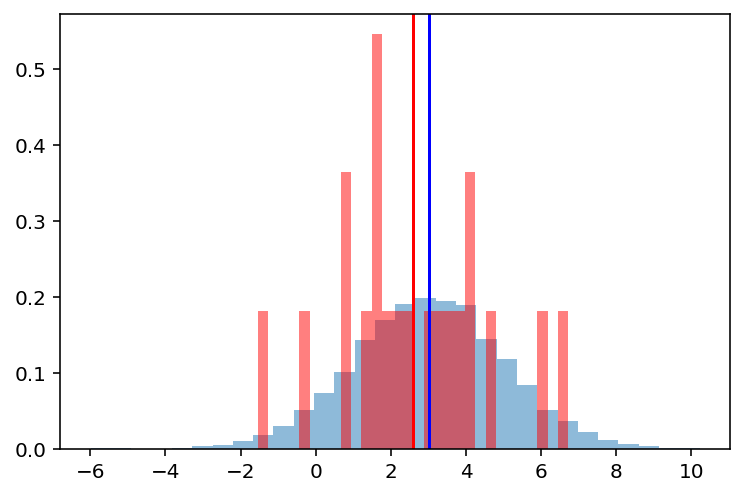

In [4]:
# Create a sample distribution with less data points
sample_mean, sample_sigma = 3, 2
sample = np.random.normal(sample_mean, sample_sigma, 20)

# Look at the descriptive statistics of our sample
print(stats.describe(sample))

# Plot our histogram, with alpha to 0.5 which will make the chart slightly transparent
plt.hist(pop, 30, alpha=0.5, density=True)
plt.hist(sample, 30, alpha=0.5, color='r',density=True)
plt.axvline(np.mean(pop),color='blue') # Take the mean and plot a vertical blue line 
plt.axvline(np.mean(sample),color='red') # Take the mean and plot a vertical red line 
plt.show()

>Answer Q1 on the quiz.


<a id="two"></a>
## Part Two: The Central Limit Theorem

With fewer samples, the mean of the sample distribution tends to be further from the mean of the population distribution. This is known as the **central limit theorem**, which states that the distribution of sample means will become increasingly close to a normal distribution as the sample size increases, regardless of the shape of the population distribution.

>**Task**: The cell below will illustrate the central limit theorem by plotting the distribution of sample means with different sample sizes. All you need to do is run the cell! This cell will take ~10 seconds to run.

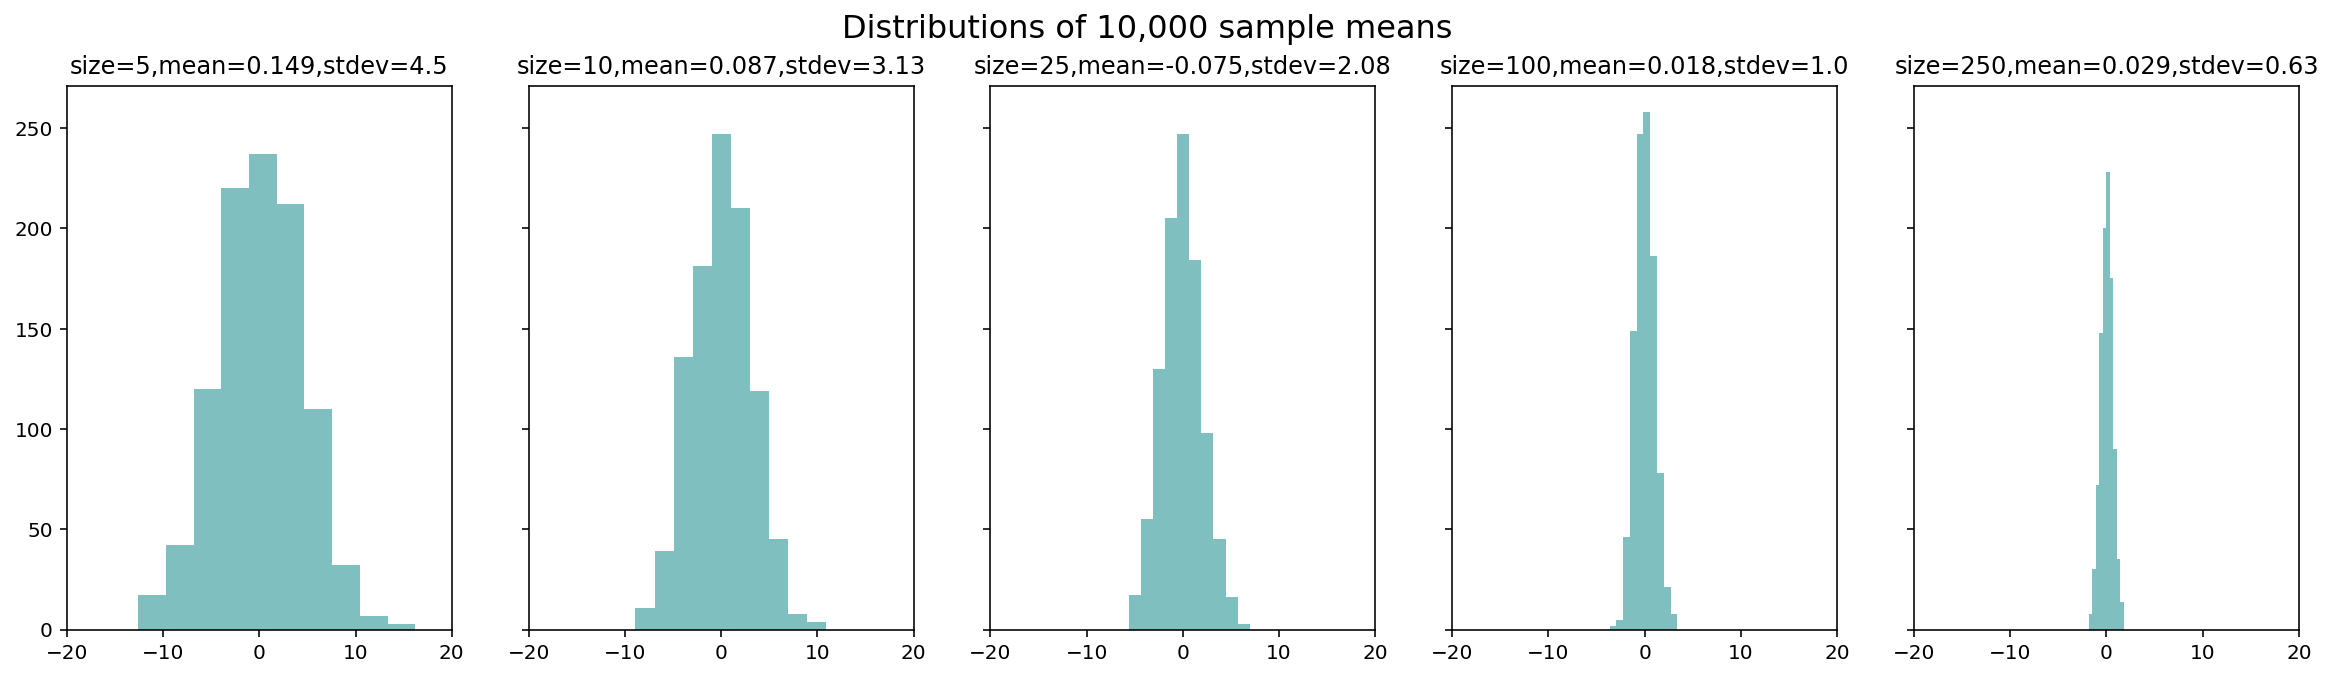

In [5]:
fig,ax = plt.subplots(1,5,figsize=(20,5),sharey=True) # Set up the plot

mu = 0 # These distributions will have a mean of zero
sample_sizes = [5,10,25,100,250] # Set a list of sample sizes for our plots 
sample_means = []

# For each subplot, create a plot.
for a in range(len(ax)):   
    
    # Calculate the mean of sample of sample_size designated above, 1000 times
    for x in range(1000):
        sample_size = sample_sizes[a]
        sample_dist = np.random.normal(mu, 10, sample_size) # Create a normal distribution with mu, sigma
        sample_means.append(np.mean(sample_dist)) # Append the mean of this distribution
        
    ax[a].hist(sample_means,color='teal',alpha = .5) # Plot the distribution of means
    ax[a].set_title('size='+str(sample_size)+',mean='+str(np.round(np.mean(sample_means),3))+',stdev='+str(np.round(np.std(sample_means),2)))
    ax[a].set_xlim([-20,20])
    sample_means = [] # Reset the sample means

plt.suptitle('Distributions of 10,000 sample means',fontsize=16)

plt.show()

<a id="three"></a>
## Part Three: Skewed Distributions

However, not every population in nature is **normally distributed**. In fact, most populations are slightly skewed. Let's demonstrate a population distribution and sample distribution that is drawn from a [gamma distribution](https://en.wikipedia.org/wiki/Gamma_distribution).

We're going to use [`np.random.gamma`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.gamma.html) to create this distribution. This function takes several parameters: the first two define the shape and scale, the third defines the size of the distribution.

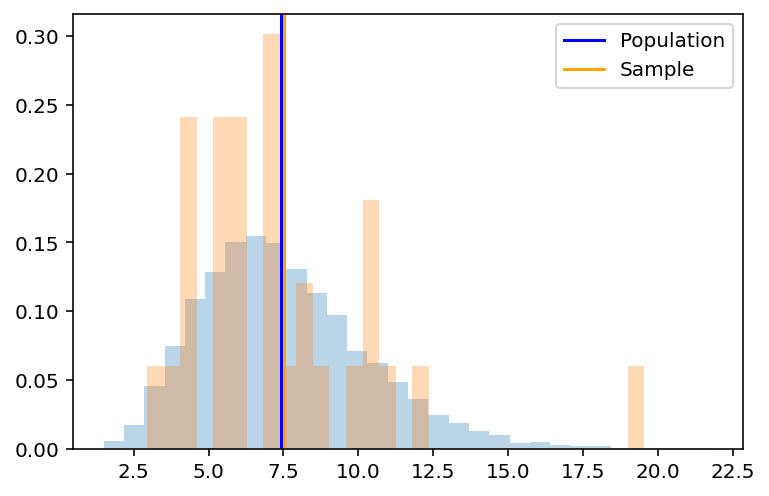

In [6]:
# Create a skewed distribution of 10,000 points with our given mu & sigma
pop_size = 10000
sample_size = 30

skewed_pop = np.random.gamma(7.5,1,pop_size)
skewed_sample = np.random.gamma(7.5,1,sample_size)

pop_stats = stats.describe(skewed_sample)
sample_stats = stats.describe(skewed_pop)

plt.hist(skewed_pop, 30, alpha = .3, density=True)
plt.hist(skewed_sample, 30, alpha = .3, density=True)
plt.axvline(pop_stats.mean,color='blue')
plt.axvline(sample_stats.mean,color='orange')
plt.legend(['Population','Sample'])

plt.show()

You might notice that with this skewed population, the mean is a pretty poor descriptor of both distributions. **When the skew is bad (*statistically bad*), we should report the median.**

><b>Task</b>: Rework our demonstration of the central limit theorem for a skewed, rather than a normal, population. You can do so by changing the type of histogram that the central limit theorem demonstration is drawing from. In other words, change the line that says `np.random.normal` to create a gamma distribution with the parameters above. **Be sure to keep the original parameters (7.5, 1) for the shape of the gamma distribution, but use the `sample_size` variable to define the size.**

> Does the theorem still hold? Answer Q2 on the quiz.

### Check the skewness of the Allen Institute time constant data

As an example of how you'd implement these statistics, let's look at some data that characterizes the intrinsic electrophysiology in different cell types, and includes information about whether the cells have spiny or aspiny dendrites. Here, we'll test for significant differences in those data.

In [7]:
data = pd.read_csv('Data/mouse_cell_metrics.csv')
spiny_data = data[data['dendrite_type']=='spiny']
aspiny_data = data[data['dendrite_type']=='aspiny']

spiny_data.head()

,cell_surface_area,dendrite_type,rheobase,input_resistance,tau
4,298.096557,spiny,30.000002,338.629120,35.177373
26,652.363854,spiny,190.000000,123.666160,20.652134
60,360.609316,spiny,150.000000,141.496464,13.239549
84,507.314114,spiny,170.000000,106.738512,14.646495
127,641.059294,spiny,130.000000,342.799552,15.623113


First, we need to know if our data is skewed or not. To test for skewness, we can use [`stats.skewtest`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.skewtest.html#scipy.stats.skewtest) to test. This method implements the <a href="https://www.jstor.org/stable/2684359?seq=1">D'Agostino-Pearson skewness test</a>, one of many different tests (e.g., the Kolmogorov-Smirov test) that can be used to check the normality of a distribution. **If the skew test gives us a p-value of less than 0.05, the population is skewed.**

>**Task**: Use the cell below to check the skew of both the aspiny and spiny **tau** data. You'll need to change the sample that is created in the first line in order to change spiny to aspiny. Once you're done, answer Q3.

In [ ]:
sample = spiny_data['tau'] # Choose which data to use

stat,pvalue = stats.skewtest(sample) # Run the skew test

# Print the p value of the skew test up to 30 decimal points
print('The skewtest p-value is ' + '%.30f' % pvalue) 

plt.hist(sample) # Create a histogram
plt.ylabel('# of Cells')
plt.xlabel('Rheobase')
plt.show()

<a id="four"></a>
## Part Four: Hypothesis Testing

### *Inferential statistics* generalize from observed data to the world at large

Most often, the goal of our hypothesis testing is to test whether or not two distributions are different, or if a distribution has a different mean than the underlying population distribution.

The SciPy stats package has [many hypothesis testing tools](https://docs.scipy.org/doc/scipy/reference/stats.html) (see Statistical Tests). In most cases, we will be testing whether two or more distributions are different from eachother.

If we know our distributions are normal (they're generated from a normal distribution!) we could use **parametric statistics** to test our hypothesis. To test for differences between normal populations, we can use the independent t-test in our stats package: `stats.ttest_ind()`. If we had paired samples, we would use a dependent t-test [as seen here](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_rel.html#scipy.stats.ttest_rel).

If one of our populations is skewed, however, we **cannot use a t-test**. A t-test assumes that the populations are normally distributed. For skewed populations, we can use either the [Mann-Whitney U](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.mannwhitneyu.html#scipy.stats.mannwhitneyu) (for independent samples, `stats.mannwhitneyu()`) or the [Wilcoxon Signed Rank Test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.wilcoxon.html#scipy.stats.wilcoxon) (for dependent/paired samples,`stats.wilcoxon()`). Below, we'll generate two random populations, one normal and one skewed, and see whether they are significantly different.

In [ ]:
skewed_pop = np.random.gamma(8,1,100) # Create a skewed distribution with 100 points
comparison_pop = np.random.normal(7.5,2,100) # Create a normal distribution with 100 points

print(stats.ttest_ind(skewed_pop,comparison_pop)) # to run an independent t-test
print(stats.mannwhitneyu(skewed_pop,comparison_pop)) # to run a mannwhitneyu
print(stats.wilcoxon(skewed_pop,comparison_pop)) # to run a wilcoxon signed rank test

# Plot the distributions we created above
plt.hist(skewed_pop,alpha=.5)
plt.hist(comparison_pop,alpha=.5)
plt.show()

<a id="five"></a>
## Part 5. Do spiny and aspiny cells have significantly different time constants?

> *Task*: Using the code provided above, and given what we know about the skewness of our data, choose and run a statistical test that compares `aspiny_data['tau']` to `spiny_data['tau']`. When you're done, answer Q4.

In [ ]:
# Run your code here!


<a id="refs"></a>
## References & resources
I *strongly* recommend reading the [Points of significance](https://www.nature.com/collections/qghhqm/pointsofsignificance) series from *Nature* which covers many of these topics. This lecture specifically focuses on [The Importance of Being Uncertain](https://www.nature.com/articles/nmeth.2613).

For a demonstration on how to animate the central limit theorem, see [this Github notebook](https://github.com/rohanjoseph93/Central-Limit-Theorem/blob/master/Central%20Limit%20Theorem.ipynb).

Consider working through the examples in [Inferential thinking](https://www.inferentialthinking.com/chapters/11/Testing_Hypotheses.html).

This notebook borrows code from [Hypothesis tests in Python](https://datasciencechalktalk.com/2019/09/02/hypothesis-tests-with-python/) by Valentina Alto and ideas from a variety of other sources, including [Towards Data Science](https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce).